   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Adding Multiple Indicators)


In [211]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [212]:
import warnings
warnings.filterwarnings("ignore")

In [213]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1D"
NUM_FEATURES = 0

In [214]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_ASK_1H_14F.csv
EURUSD_FULL_1D_20F.csv
EURUSD_FULL_1D_26F.csv
EURUSD_FULL_1H_20F.csv
EURUSD_FULL_1M_20F.csv
EURUSD_FULL_4H_20F.csv


## Read CSV

### Read Dataset From Regression

In [215]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[2], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...           A

### Add EMA Function

In [216]:
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(com=0.5).mean(), name = 'EMA_Close_' + str(n))
    df = df.join(EMA)  
    return df

In [217]:
DATASET_FULL = EMA(DATASET_FULL, 5)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200,EMA_Close_5
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.257330
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,0.000787,0.000787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258072
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,0.003862,0.004650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.261608
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,0.004053,0.008703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.266125
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,0.002523,0.011226,1.263726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.269723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,...,0.007045,-0.058673,1.092892,1.088177,1.088072,1.093769,1.099587,1.100226,1.101322,1.095430
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,...,0.003479,-0.055194,1.094242,1.088913,1.088046,1.093691,1.099543,1.100193,1.101344,1.099603
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,...,0.005564,-0.049630,1.097680,1.089716,1.088150,1.093679,1.099525,1.100198,1.101403,1.105081
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,...,0.002609,-0.047021,1.101656,1.090363,1.088460,1.093724,1.099555,1.100229,1.101465,1.108834


In [218]:
DATASET_FULL['EMA_Close_5'].describe()

count    5137.000000
mean        1.263954
std         0.122738
min         1.040019
25%         1.149416
50%         1.270799
75%         1.351185
max         1.594288
Name: EMA_Close_5, dtype: float64

In [219]:
DATASET_FULL['EMA_Close_5'].isnull().sum()

0

(5137, 27)


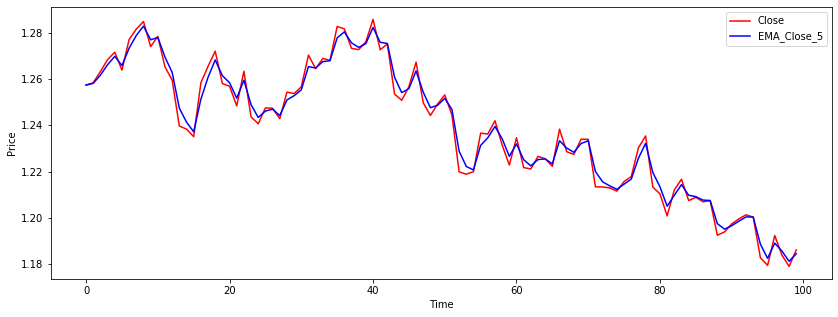

In [220]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['EMA_Close_5'][INICIO:FIN], color = 'blue', label = 'EMA_Close_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

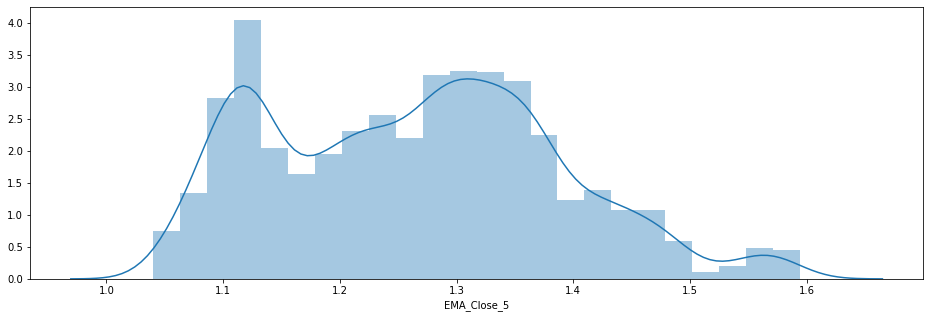

In [221]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['EMA_Close_5']);

### MOM Function

In [222]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [223]:
DATASET_FULL = MOM(DATASET_FULL, 1)
DATASET_FULL = MOM(DATASET_FULL, 2)
DATASET_FULL = MOM(DATASET_FULL, 3)
DATASET_FULL = MOM(DATASET_FULL, 4)
DATASET_FULL = MOM(DATASET_FULL, 5)
DATASET_FULL = MOM(DATASET_FULL, 6)
DATASET_FULL = MOM(DATASET_FULL, 7)
DATASET_FULL = MOM(DATASET_FULL, 8)
DATASET_FULL = MOM(DATASET_FULL, 9)
DATASET_FULL = MOM(DATASET_FULL, 10)
DATASET_FULL = MOM(DATASET_FULL, 11)
DATASET_FULL = MOM(DATASET_FULL, 12)
DATASET_FULL = MOM(DATASET_FULL, 13)
DATASET_FULL = MOM(DATASET_FULL, 14)
DATASET_FULL = MOM(DATASET_FULL, 15)
DATASET_FULL = MOM(DATASET_FULL, 25)
DATASET_FULL = MOM(DATASET_FULL, 36)
DATASET_FULL = MOM(DATASET_FULL, 50)
DATASET_FULL = MOM(DATASET_FULL, 75)
DATASET_FULL = MOM(DATASET_FULL, 80)
DATASET_FULL = MOM(DATASET_FULL, 100)
print(DATASET_FULL)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Momentum_1

In [224]:
print(DATASET_FULL['Momentum_5'].describe())
print(DATASET_FULL['Momentum_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Momentum_5'].isnull().sum())

count    5132.000000
mean       -0.000154
std         0.015484
min        -0.082160
25%        -0.008653
50%         0.000200
75%         0.009120
max         0.107750
Name: Momentum_5, dtype: float64
5
0


In [225]:
print(DATASET_FULL['Momentum_100'].isnull().sum())

0


(5137, 48)


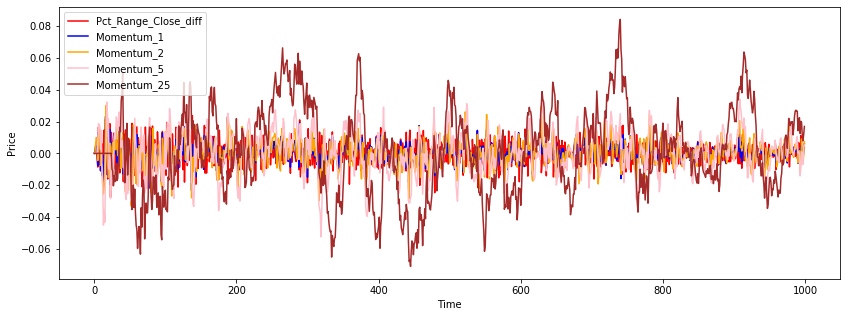

In [226]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Momentum_1'][INICIO:FIN], color = 'blue', label = 'Momentum_1')
pyplot.plot(DATASET_FULL['Momentum_2'][INICIO:FIN], color = 'orange', label = 'Momentum_2')
pyplot.plot(DATASET_FULL['Momentum_5'][INICIO:FIN], color = 'pink', label = 'Momentum_5')
pyplot.plot(DATASET_FULL['Momentum_25'][INICIO:FIN], color = 'brown', label = 'Momentum_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

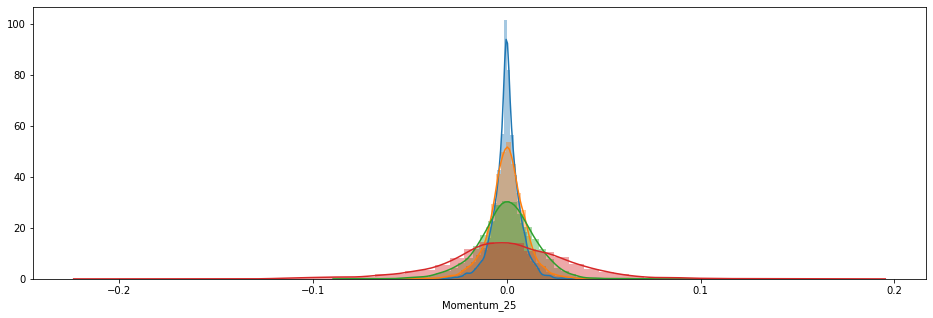

In [227]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Momentum_1']);
sns.distplot(DATASET_FULL['Momentum_2']);
sns.distplot(DATASET_FULL['Momentum_5']);
sns.distplot(DATASET_FULL['Momentum_25']);


In [228]:
def get_rsi(df, n=14):
    deltas = (df['Close']-df['Close'].shift(1)).fillna(0)

    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1
    df['rsi'+'_'+str(n)] = rsi_series /100
    return df

In [229]:
DATASET_FULL = get_rsi(DATASET_FULL, 5)

In [230]:
DATASET_FULL = get_rsi(DATASET_FULL, 14)

In [231]:
DATASET_FULL = get_rsi(DATASET_FULL, 25)
DATASET_FULL = get_rsi(DATASET_FULL, 50)
DATASET_FULL = get_rsi(DATASET_FULL, 70)

In [232]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Momentum_36,Momentum_50,Momentum_75,Momentum_80,Momentum_100,rsi_5,rsi_14,rsi_25,rsi_50,rsi_70
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,...,-0.00048,-0.01584,-0.00502,0.01398,-0.00502,0.720805,0.600762,0.545438,0.511403,0.503078
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,...,0.01129,-0.00128,-0.00351,0.01681,-0.00783,0.780822,0.632941,0.564510,0.521357,0.510561
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,...,0.02192,0.00517,-0.00665,0.01982,-0.00112,0.846857,0.677819,0.593050,0.536808,0.522273
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,...,0.02285,0.01554,-0.00696,0.02204,0.00445,0.869948,0.696650,0.605739,0.543892,0.527678


(5137, 53)


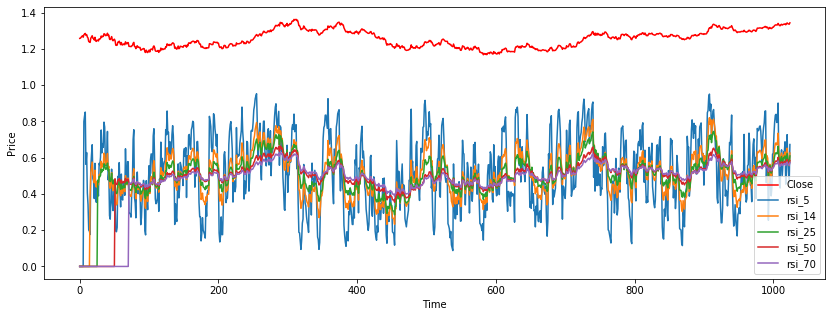

In [233]:
INICIO = 0
FIN = 1025
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['rsi_5'][INICIO:FIN], label = 'rsi_5')
pyplot.plot(DATASET_FULL['rsi_14'][INICIO:FIN], label = 'rsi_14')
pyplot.plot(DATASET_FULL['rsi_25'][INICIO:FIN], label = 'rsi_25')
pyplot.plot(DATASET_FULL['rsi_50'][INICIO:FIN], label = 'rsi_50')
pyplot.plot(DATASET_FULL['rsi_70'][INICIO:FIN], label = 'rsi_70')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [234]:
print(DATASET_FULL['rsi_5'].describe())
print(DATASET_FULL['rsi_5'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['rsi_5'].isnull().sum())

count    5137.000000
mean        0.500208
std         0.205402
min         0.000000
25%         0.340595
50%         0.498746
75%         0.659542
max         0.980391
Name: rsi_5, dtype: float64
0
0


In [235]:
#Bollinger Bands  
def BBANDS(df, n):  
    no_of_std = 1.5
    MA = pd.Series(pd.Series(df['Close'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['Close'].rolling(n).std()))  
    
    
    df['Rolling_Mean'+ str(n)] = MA
    df['Bollinger_High'] = MA + (MSD * no_of_std)
    df['Bollinger_Low'] = MA - (MSD * no_of_std)
    
    return df

In [236]:
DATASET_FULL = BBANDS(DATASET_FULL, 25)
#DATASET_FULL = BBANDS(DATASET_FULL, 25)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Momentum_80  Momentum_100     rsi_5  \
5132   1.09957  1.08969    1.09784  ...      0.01398      -0.00502  0.720805   
5133   1.10307  1.09340    1.10166  ...      0.01681      -0.00783  0.780822   
5134   1.10934  1.09916    1.10779  ...      0.01982      -0.00112  0.846857   
5135   1.11451  1.10698    1.11036  ...      0.02204       0.00445  0.869948   
5136   1.11195  1.11023    1.11156  ...      0.01191       0.00709  0.876930   

        rsi_14    rsi_25    rsi_50    rsi_70  Roll

In [237]:
print(DATASET_FULL['Rolling_Mean25'].describe())
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())

count    5113.000000
mean        1.264334
std         0.122031
min         1.048496
25%         1.153374
50%         1.271383
75%         1.350748
max         1.579363
Name: Rolling_Mean25, dtype: float64
24
0


In [238]:
print(DATASET_FULL['Bollinger_High'].describe())
print(DATASET_FULL['Bollinger_High'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_High'].isnull().sum())

count    5137.000000
mean        1.282867
std         0.125468
min         1.058072
25%         1.170434
50%         1.287889
75%         1.368042
max         1.602895
Name: Bollinger_High, dtype: float64
0
0


In [239]:
print(DATASET_FULL['Bollinger_Low'].describe())
print(DATASET_FULL['Bollinger_Low'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_Low'].isnull().sum())

count    5137.000000
mean        1.245769
std         0.118897
min         1.035640
25%         1.136182
50%         1.250107
75%         1.330290
max         1.566696
Name: Bollinger_Low, dtype: float64
0
0


(5137, 56)


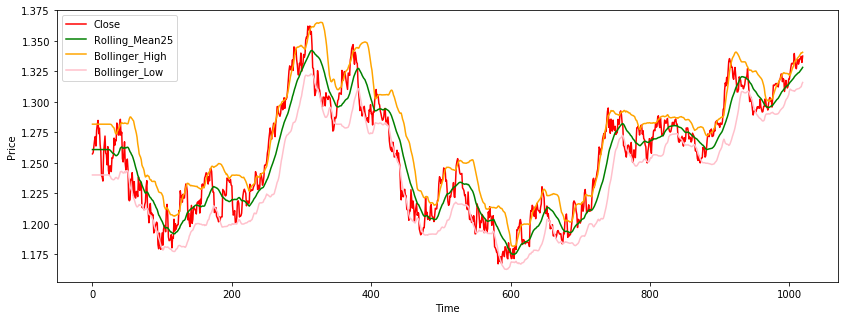

In [240]:
INICIO = 0
FIN = 1020
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Rolling_Mean25'][INICIO:FIN], color = 'green', label = 'Rolling_Mean25')
pyplot.plot(DATASET_FULL['Bollinger_High'][INICIO:FIN], color = 'orange', label = 'Bollinger_High')
pyplot.plot(DATASET_FULL['Bollinger_Low'][INICIO:FIN], color = 'pink', label = 'Bollinger_Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

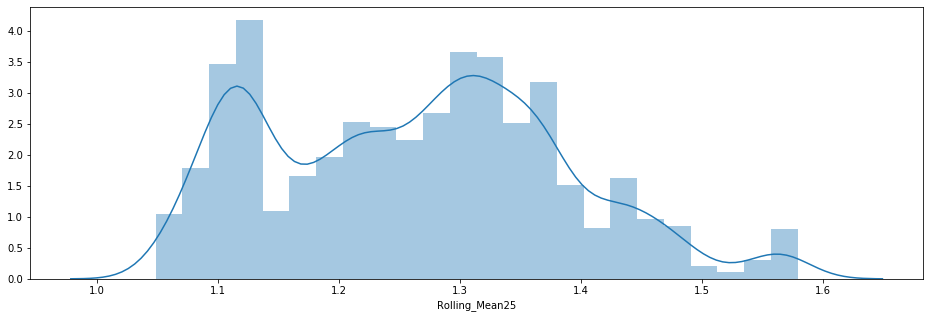

In [241]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Rolling_Mean25']);

In [242]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO_k')  
    df = df.join(SOk)  
    return df

In [243]:
DATASET_FULL = STOK(DATASET_FULL)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Momentum_100     rsi_5    rsi_14  \
5132   1.09957  1.08969    1.09784  ...      -0.00502  0.720805  0.600762   
5133   1.10307  1.09340    1.10166  ...      -0.00783  0.780822  0.632941   
5134   1.10934  1.09916    1.10779  ...      -0.00112  0.846857  0.677819   
5135   1.11451  1.10698    1.11036  ...       0.00445  0.869948  0.696650   
5136   1.11195  1.11023    1.11156  ...       0.00709  0.876930  0.702291   

        rsi_25    rsi_50    rsi_70  Rolling_Mean25  Bollinger_High  

In [244]:
print(DATASET_FULL['SO_k'].describe())
print(DATASET_FULL['SO_k'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO_k'].isnull().sum())

count    5137.000000
mean        0.500685
std         0.291052
min         0.000000
25%         0.228448
50%         0.508889
75%         0.768072
max         1.000000
Name: SO_k, dtype: float64
0
0


(5137, 57)


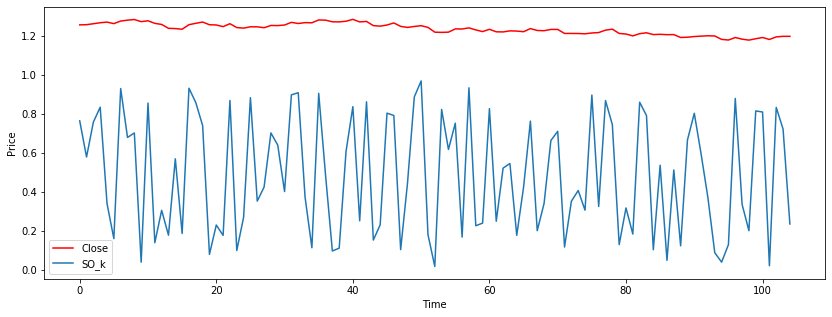

In [245]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO_k'][INICIO:FIN], label = 'SO_k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

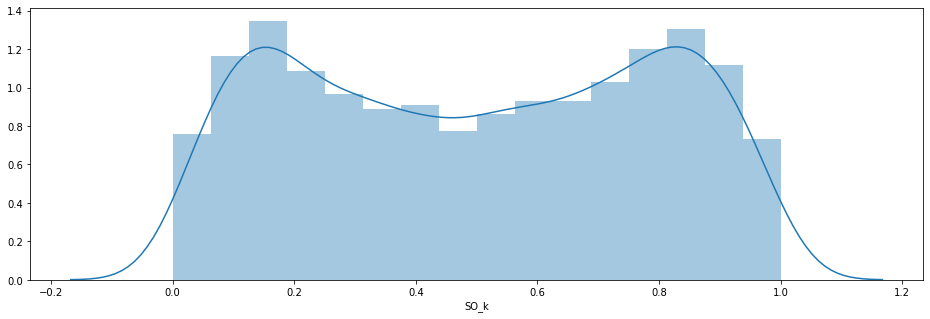

In [246]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO_k']);

In [247]:
# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  

In [248]:
DATASET_FULL = STO(DATASET_FULL,1,2)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...    rsi_14    rsi_25    rsi_50  \
5132   1.09957  1.08969    1.09784  ...  0.600762  0.545438  0.511403   
5133   1.10307  1.09340    1.10166  ...  0.632941  0.564510  0.521357   
5134   1.10934  1.09916    1.10779  ...  0.677819  0.593050  0.536808   
5135   1.11451  1.10698    1.11036  ...  0.696650  0.605739  0.543892   
5136   1.11195  1.11023    1.11156  ...  0.702291  0.609557  0.546024   

        rsi_70  Rolling_Mean25  Bollinger_High  Bollinger_Low      SO_k  \
5132  0.503078   

In [249]:
print(DATASET_FULL['SO%k1'].describe())
print(DATASET_FULL['SO%k1'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k1'].isnull().sum())

print(DATASET_FULL['SO%d2'].describe())
print(DATASET_FULL['SO%d2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%d2'].isnull().sum())

count    5137.000000
mean        0.500685
std         0.291052
min         0.000000
25%         0.228448
50%         0.508889
75%         0.768072
max         1.000000
Name: SO%k1, dtype: float64
0
0
count    5137.000000
mean        0.500692
std         0.204464
min         0.035964
25%         0.326485
50%         0.501370
75%         0.674298
max         0.955865
Name: SO%d2, dtype: float64
0
0


(5137, 59)


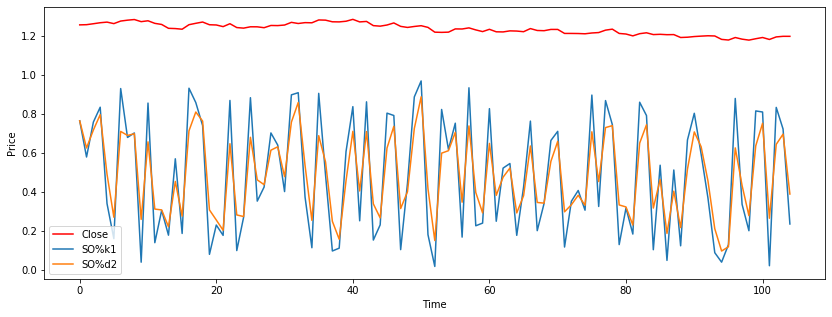

In [250]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k1'][INICIO:FIN], label = 'SO%k1')
pyplot.plot(DATASET_FULL['SO%d2'][INICIO:FIN], label = 'SO%d2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

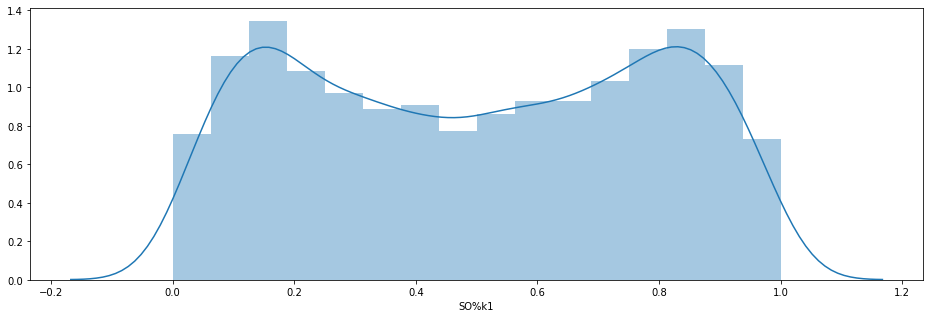

In [251]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO%k1']);

In [252]:
#Trix  
def TRIX(df, n):  
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()  
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [253]:
DATASET_FULL = TRIX(DATASET_FULL,2)
DATASET_FULL = TRIX(DATASET_FULL,5)
DATASET_FULL = TRIX(DATASET_FULL,15)
DATASET_FULL = TRIX(DATASET_FULL,25)
DATASET_FULL = TRIX(DATASET_FULL,50)
DATASET_FULL = TRIX(DATASET_FULL,75)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Bollinger_Low      SO_k     SO%k1  \
5132   1.09957  1.08969    1.09784  ...       1.079004  0.825253  0.825253   
5133   1.10307  1.09340    1.10166  ...       1.079026  0.853457  0.853457   
5134   1.10934  1.09916    1.10779  ...       1.078330  0.847741  0.847741   
5135   1.11451  1.10698    1.11036  ...       1.077409  0.492000  0.492000   
5136   1.11195  1.11023    1.11156  ...       1.076631  0.687831  0.687831   

         SO%d2    Trix_2    Trix_5   Trix_15   Trix_25   Trix_

In [254]:
print(DATASET_FULL['Trix_5'].describe())
print(DATASET_FULL['Trix_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Trix_5'].isnull().sum())

count    5128.000000
mean       -0.000028
std         0.001472
min        -0.007245
25%        -0.000913
50%        -0.000007
75%         0.000884
max         0.010859
Name: Trix_5, dtype: float64
9
0


(5137, 65)


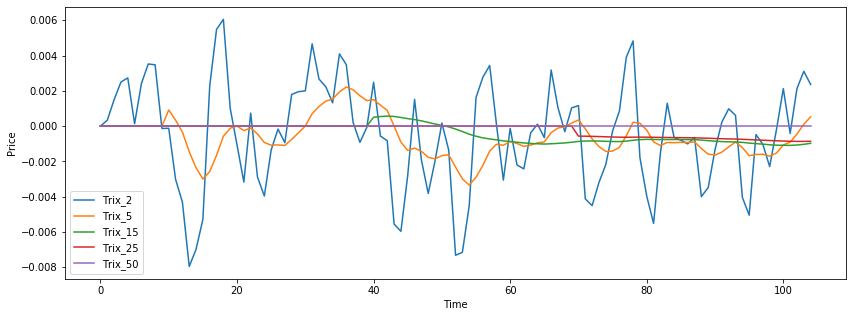

In [255]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Trix_2'][INICIO:FIN], label = 'Trix_2')
pyplot.plot(DATASET_FULL['Trix_5'][INICIO:FIN], label = 'Trix_5')
pyplot.plot(DATASET_FULL['Trix_15'][INICIO:FIN], label = 'Trix_15')
pyplot.plot(DATASET_FULL['Trix_25'][INICIO:FIN], label = 'Trix_25')
pyplot.plot(DATASET_FULL['Trix_50'][INICIO:FIN], label = 'Trix_50')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

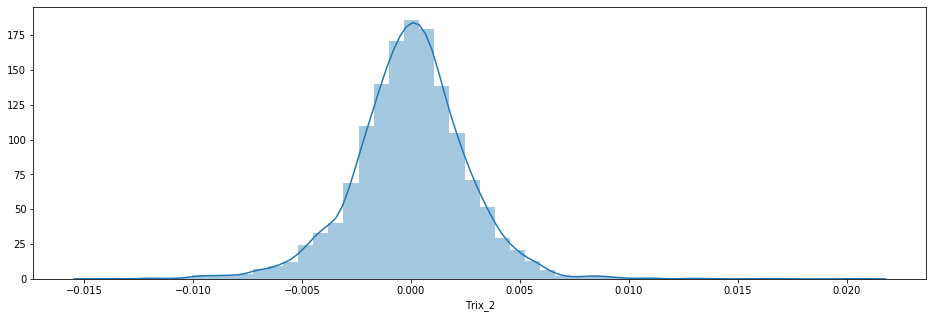

In [256]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Trix_2']);

In [257]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Close'].ewm(span = n_fast, min_periods = n_slow-1).mean())
    EMAslow = pd.Series(df['Close'].ewm(span = n_slow, min_periods = n_fast-1).mean())
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [258]:
DATASET_FULL = MACD(DATASET_FULL,5,25)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...     SO%d2    Trix_2    Trix_5  \
5132   1.09957  1.08969    1.09784  ...  0.791580  0.001542  0.000717   
5133   1.10307  1.09340    1.10166  ...  0.832831  0.002813  0.000947   
5134   1.10934  1.09916    1.10779  ...  0.842771  0.003920  0.001341   
5135   1.11451  1.10698    1.11036  ...  0.608924  0.003808  0.001728   
5136   1.11195  1.11023    1.11156  ...  0.661528  0.002834  0.001977   

       Trix_15   Trix_25   Trix_50   Trix_75  MACD_5_25  MACDsign_5_25  \
5132  0.000059 -0.

In [259]:
print(DATASET_FULL['MACD_5_25'].describe())
print(DATASET_FULL['MACD_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACD_5_25'].isnull().sum())



count    5114.000000
mean       -0.000328
std         0.012601
min        -0.067202
25%        -0.007236
50%        -0.000074
75%         0.007355
max         0.076299
Name: MACD_5_25, dtype: float64
23
0


(5137, 68)


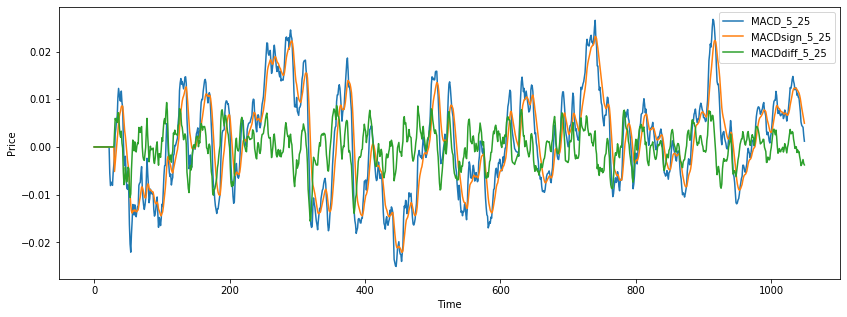

In [260]:
INICIO = 0
FIN = 1050
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['MACD_5_25'][INICIO:FIN], label = 'MACD_5_25')
pyplot.plot(DATASET_FULL['MACDsign_5_25'][INICIO:FIN], label = 'MACDsign_5_25')
pyplot.plot(DATASET_FULL['MACDdiff_5_25'][INICIO:FIN], label = 'MACDdiff_5_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

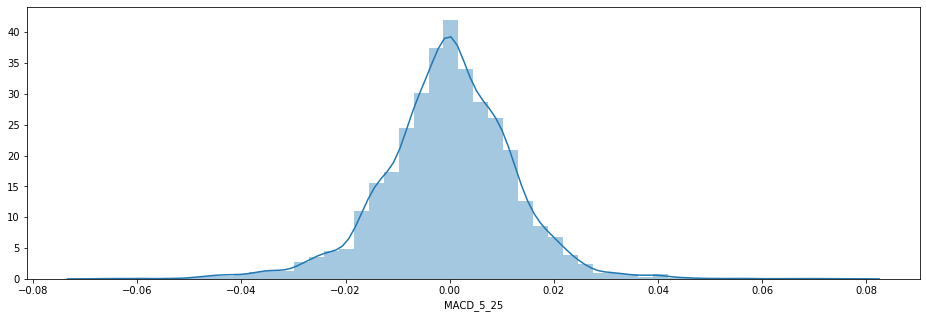

In [261]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['MACD_5_25']);

In [262]:
#Mass Index  
def MassI(df, period = 25, min_periods = 8, span=9):  
    Range = df['High'] - df['Low']  
    EX1 = Range.ewm(span = 9, min_periods = 8).mean()
    EX2 = EX1.ewm(span = 9, min_periods = 8).mean()
    Mass = EX1 / EX2  
    MassI = pd.Series(Mass.rolling(period).sum(),name = 'Mass_Index_'+str(period)+'_'+str(min_periods)+'_'+str(span))  
    df = df.join(MassI)  
    return df

In [263]:
DATASET_FULL = MassI(DATASET_FULL,25,8,9)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...    Trix_2    Trix_5   Trix_15  \
5132   1.09957  1.08969    1.09784  ...  0.001542  0.000717  0.000059   
5133   1.10307  1.09340    1.10166  ...  0.002813  0.000947  0.000110   
5134   1.10934  1.09916    1.10779  ...  0.003920  0.001341  0.000176   
5135   1.11451  1.10698    1.11036  ...  0.003808  0.001728  0.000255   
5136   1.11195  1.11023    1.11156  ...  0.002834  0.001977  0.000339   

       Trix_25   Trix_50   Trix_75  MACD_5_25  MACDsign_5_25  MACDdiff_5_25  \
5132 -0.00015

In [264]:
print(DATASET_FULL['Mass_Index_25_8_9'].describe())
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
#DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())

count    5099.000000
mean       24.950176
std         0.835848
min        21.687426
25%        24.450495
50%        24.895582
75%        25.375500
max        30.744898
Name: Mass_Index_25_8_9, dtype: float64
38
0


(5137, 69)


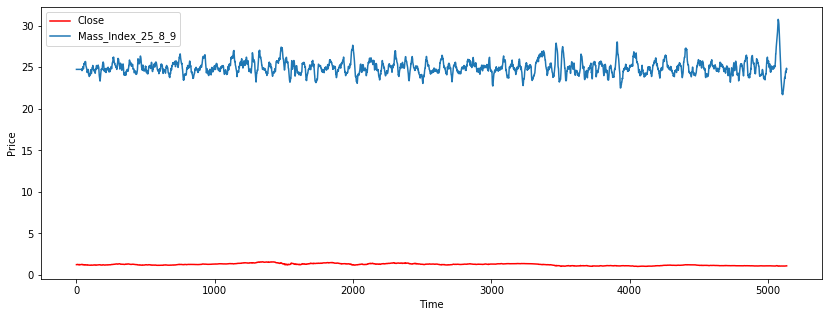

In [265]:
INICIO = 0
FIN = 10500
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Mass_Index_25_8_9'][INICIO:FIN], label = 'Mass_Index_25_8_9')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

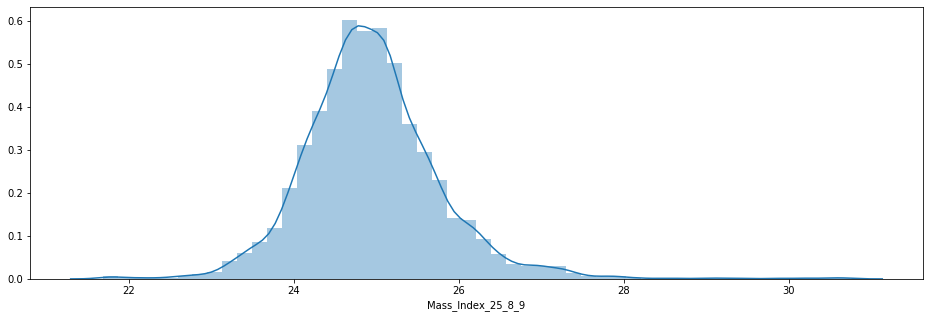

In [266]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Mass_Index_25_8_9']);

In [267]:
DATASET_FULL.shape

(5137, 69)

In [205]:
# https://github.com/bukosabino/ta/blob/master/examples_to_use/all_features_example.py
import ta
DATASET_FULL = ta.add_all_ta_features(DATASET_FULL, "Open", "High", "Low", "Close", "Volume", fillna=True)



In [206]:
DATASET_FULL.shape

(5137, 144)

In [207]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.000000,76.440177,76.440177,-23.559823,0.000000,1.257330,0.000000,-0.522913,0.000000,0.000000
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,25.516102,71.590909,74.015543,-28.409091,0.000000,1.257865,0.000000,0.078738,0.078707,0.078738
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,36.762821,90.553382,79.528156,-9.446618,0.000000,1.260854,0.000000,0.386229,0.385485,0.465272
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,44.645711,95.306214,85.816835,-4.693786,0.000000,1.265002,0.000000,0.405326,0.404507,0.872484
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,41.690793,72.223859,86.027818,-27.776141,0.000000,1.268630,0.000000,0.252306,0.251988,1.126991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,...,53.470734,87.194861,66.181299,-12.805139,0.005839,1.090343,1.224426,0.704464,0.701995,-12.682430
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,...,60.537067,94.453125,78.650685,-5.546875,0.005649,1.092116,1.806605,0.347946,0.347343,-12.378612
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,...,63.147537,95.134965,92.260984,-4.865035,0.007610,1.095113,2.515176,0.556418,0.554876,-11.891071
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,...,66.774381,89.705485,93.097858,-10.294515,0.011013,1.097529,2.655317,0.260873,0.260533,-11.661219


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [268]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'R-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

R-EURUSD_FULL_1D_69F.csv


In [269]:
DATASET_FULL.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       'AQM_Pct_Range_Close_diff', 'AQM_Pct_Range_Close', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_100', 'MA_Close_150',
       'MA_Close_175', 'MA_Close_200', 'EMA_Close_5', 'Momentum_1',
       'Momentum_2', 'Momentum_3', 'Momentum_4', 'Momentum_5', 'Momentum_6',
       'Momentum_7', 'Momentum_8', 'Momentum_9', 'Momentum_10', 'Momentum_11',
       'Momentum_12', 'Momentum_13', 'Momentum_14', 'Momentum_15',
       'Momentum_25', 'Momentum_36', 'Momentum_50', 'Momentum_75',
       'Momentum_80', 'Momentum_100', 'rsi_5', 'rsi_14', 'rsi_25', 'rsi_50',
       'rsi_70', 'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'SO_k',
       'SO%k1', 'SO%d2', 'Trix_2', 'Trix_5', 'Trix_15', 'Trix_25', 'Trix_50',
       'Trix_75', 'MACD_5_25', 'MACDsign_5_25', 

In [270]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados-regression/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)